In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #ensemble=>앙상블모델
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


### 1번방법 : 결측치가 들어가있는데이터들 없애기만 하고 학습시키기

In [131]:
data = pd.read_csv(r'C:\202105_lab2\2.machine_learning\머신러닝 미니프로젝트 template\cs_data.csv')

In [117]:
# MonthlyIncome와 NumberOfDependents에 결측치 존재
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [118]:
# 데이터 전처리
data.dropna(inplace=True) # 결측치가 포함되있는 데이터는 날려버리겠음

In [132]:
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [7]:
X_train.shape, X_test.shape

((96215, 11), (24054, 11))

In [121]:
# 검증단계
tree = DecisionTreeClassifier(max_depth=1, random_state=0)
rf = RandomForestClassifier(max_depth=1, n_estimators=200, random_state=0)

# 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 학습
proba_train_tree = tree.predict_proba(X_train)[:,1]
proba_train_rf = rf.predict_proba(X_train)[:,1]

#추론(확률) - test
proba_test_tree = tree.predict_proba(X_test)[:,1] #양성
proba_test_rf = rf.predict_proba(X_test)[:,1]


In [65]:
fprs1, tprs1, thresholds1 = roc_curve(y_test, proba_test_tree) #tree 예측결과
fprs2, tprs2, thresholds2 = roc_curve(y_test, proba_test_rf) # random forest예측결과
fprs1.shape, tprs1.shape, thresholds1.shape, fprs2.shape, tprs2.shape, thresholds2.shape

((3,), (3,), (3,), (1232,), (1232,), (1232,))

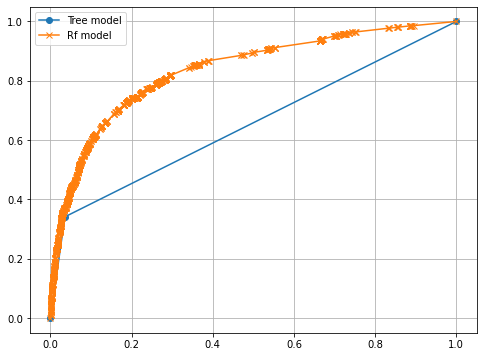

In [66]:
# ROC curve 직접 작성
plt.figure(figsize=(8,6))
plt.plot(fprs1, tprs1, label="Tree model", marker="o") #x:FPR, y:TPR
plt.plot(fprs2, tprs2, label="Rf model", marker="x")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# roc auc score
print("DecisionTree roc auc 점수:", roc_auc_score(y_test, proba_test_tree)) # (y정답, 양성확률)
print("RandomForest roc auc 점수:", roc_auc_score(y_test, proba_test_rf)) 

DecisionTree roc auc 점수: 0.6528198778070463
RandomForest roc auc 점수: 0.8365774117972805


rf의 n_estimators는 200으로 고정

1. max_depth=1: DecisionTree roc auc 점수: 0.6528198778070463, RandomForest roc auc 점수: 0.8365774117972805
2. max_depth=2: DecisionTree roc auc 점수: 0.7735128847278272, RandomForest roc auc 점수: 0.8443706863428374
3. max_depth=3: DecisionTree roc auc 점수: 0.8088875103527237, RandomForest roc auc 점수: 0.8474220478037092
4. max_depth=4: DecisionTree roc auc 점수: 0.8230929432022513, RandomForest roc auc 점수: 0.8493665965875135
5. max_depth=5: DecisionTree roc auc 점수: 0.8337966642579714, RandomForest roc auc 점수: 0.8514317271809553
6. max_depth=6: DecisionTree roc auc 점수: 0.8390918901032894, RandomForest roc auc 점수: 0.8530879089785403
7. max_depth=7: DecisionTree roc auc 점수: 0.8453152884125721, RandomForest roc auc 점수: 0.8536154610798414

### 1-2번 방법 :  1번에서 처리한 방식에서  feature 중요도이용

In [122]:
rf.feature_importances_

array([0.155, 0.095, 0.19 , 0.03 , 0.02 , 0.085, 0.215, 0.21 ])

In [130]:
# 중요도 낮은 feature 제거
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs','Unnamed: 0', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [125]:
X_train.shape, X_test.shape

((96215, 8), (24054, 8))

In [128]:
# 검증단계
tree = DecisionTreeClassifier(max_depth=11, random_state=0)
rf = RandomForestClassifier(max_depth=11, n_estimators=200, random_state=0)

# 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 학습
proba_train_tree = tree.predict_proba(X_train)[:,1]
proba_train_rf = rf.predict_proba(X_train)[:,1]

#추론(확률) - test
proba_test_tree = tree.predict_proba(X_test)[:,1] #양성
proba_test_rf = rf.predict_proba(X_test)[:,1]


In [129]:
# roc auc score
print("DecisionTree roc auc 점수:", roc_auc_score(y_test, proba_test_tree)) # (y정답, 양성확률)
print("RandomForest roc auc 점수:", roc_auc_score(y_test, proba_test_rf)) 

DecisionTree roc auc 점수: 0.7936662626507631
RandomForest roc auc 점수: 0.8542333826970129


### 2번방법 : StandardScaler로 전처리한후에 시도

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [38]:
data = pd.read_csv(r'C:\202105_lab2\2.machine_learning\머신러닝 미니프로젝트 template\cs_data.csv')
data.dropna(inplace=True) 
sc = StandardScaler()
sc.fit_transform(data)

array([[-1.73324571,  3.65942733, -0.01997259, ...,  4.30315443,
        -0.05447654,  0.9998099 ],
       [-1.73322261, -0.2732668 , -0.01922942, ..., -0.91755695,
        -0.05447654,  0.12902268],
       [-1.73319951, -0.2732668 , -0.02039255, ..., -0.91755695,
        -0.05447654, -0.74176455],
       ...,
       [ 1.73199761, -0.2732668 , -0.02178702, ..., -0.04743839,
        -0.05447654,  0.9998099 ],
       [ 1.73204382, -0.2732668 , -0.02295316, ..., -0.91755695,
        -0.05447654, -0.74176455],
       [ 1.73206692, -0.2732668 , -0.01964518, ...,  0.82268018,
        -0.05447654, -0.74176455]])

In [40]:
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [111]:
# 모델
rf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

# 하이퍼 파라미터 후보
param = {
    "n_estimators":[100,200,300,400,500,600,700],
    "max_depth": [1,3,5,7],
    "max_leaf_nodes":[3,5,7], #range(3,10,2)같은 방식으로 넣는것도 가능,리스트형태 아니여도됨 이터러블타입이면가능    
}

# GridSearchCV생성
gs = GridSearchCV(rf, 
                  param, 
                  scoring = 'roc_auc',
                  n_jobs=-1
                 )


# 학습
gs.fit(X_train, y_train)

# 학습
proba_train_gs = gs.predict_proba(X_train)[:,1]

#추론(확률) - test
proba_test_gs = gs.predict_proba(X_test)[:,1]

In [112]:
gs.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'n_estimators': 200}

In [113]:
gs.best_score_  

0.8444577146306734

### 2-2 : MinMaxScaler로 전처리후에 시도

In [147]:
data = pd.read_csv(r'C:\202105_lab2\2.machine_learning\머신러닝 미니프로젝트 template\cs_data.csv')

data.dropna(inplace=True) 
scaler = MinMaxScaler()
scaler.fit_transform(data)

y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train.shape, X_test.shape

((96215, 10), (24054, 10))

In [148]:
# 모델
rf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

# 하이퍼 파라미터 후보
param = {
    "n_estimators":[100,200,300,400,500,600,700],
    "max_depth": [1,3,5,7],
    "max_leaf_nodes":[3,5,7], #range(3,10,2)같은 방식으로 넣는것도 가능,리스트형태 아니여도됨 이터러블타입이면가능    
}

# GridSearchCV생성
gs = GridSearchCV(rf, 
                  param, 
                  scoring = 'roc_auc',
                  n_jobs=-1
                 )


# 학습
gs.fit(X_train, y_train)

# 학습
proba_train_gs = gs.predict_proba(X_train)[:,1]

#추론(확률) - test
proba_test_gs = gs.predict_proba(X_test)[:,1]

In [149]:
gs.best_params_, gs.best_score_

({'max_depth': 3, 'max_leaf_nodes': 7, 'n_estimators': 200},
 0.8443786705193169)

- StandardScaler,MinMaxScaler로 전처리는 그리 도움이 되지 않는다.
- 차라리 덜중요한 Feature들을 없애고 max_depth를 올리는게 정확도 올리는데 도움이됨

### 3번 :  최근접 이웃

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [152]:
data = pd.read_csv(r'C:\202105_lab2\2.machine_learning\머신러닝 미니프로젝트 template\cs_data.csv')

data.dropna(inplace=True) 

y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train.shape, X_test.shape

((96215, 10), (24054, 10))

In [157]:
order = [
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(order, verbose=True)

param = {
    "knn__n_neighbors":range(1,11),
    "knn__p":[1,2] # 1:멘하탄거리, 2:유클리디안거리
}

gs = GridSearchCV(pipeline, param, scoring='roc_auc', cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.8s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='roc_auc')

In [162]:
result_df = pd.DataFrame(gs.cv_results_)
result_df[result_df.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,"{'knn__n_neighbors': 10, 'knn__p': 2}",0.678650,0.693256,0.677228,0.684151,0.676745,0.682006,0.006212,1
17,"{'knn__n_neighbors': 9, 'knn__p': 2}",0.673783,0.688410,0.670544,0.676058,0.674820,0.676723,0.006123,2
18,"{'knn__n_neighbors': 10, 'knn__p': 1}",0.665771,0.684421,0.663729,0.673465,0.668519,0.671181,0.007381,3
15,"{'knn__n_neighbors': 8, 'knn__p': 2}",0.666977,0.680502,0.666523,0.671732,0.668937,0.670935,0.005124,4
16,"{'knn__n_neighbors': 9, 'knn__p': 1}",0.661482,0.679605,0.660453,0.665212,0.666370,0.666624,0.006857,5


In [163]:
best_model = gs.best_estimator_
roc_auc_score(y_test, best_model.predict(X_test))

0.5252592956744311

- 최근접 이웃모델은 성능이 매우안좋다

## 최종 작성코드는 1-2번 방식입니다

1-1번에서 Feature의 중요도를 살펴본뒤 중요도가 낮은 Feature제거후에 max_depth와 max_leaf_nodes를 11까지 올린뒤에 랜덤포레스트로 학습시킨게 가장 결과가 좋았습니다


최종 예측 확률 : RandomForest roc auc 점수: 0.8542333826970129